<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-первичный-обзор-данных" data-toc-modified-id="Импорт-библиотек-и-первичный-обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и первичный обзор данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Модель случайного леса</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li></ul></li><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель логистической регрессии</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Исследование-AUC-ROC-метрики" data-toc-modified-id="Исследование-AUC-ROC-метрики-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование AUC-ROC метрики</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры. Необходимо довести метрику до 0.59.
Дополнительно необходимо измерить *AUC-ROC*

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата  

**Целевой признак**:
* Exited — факт ухода клиента

## Подготовка данных

### Импорт библиотек и первичный обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df= pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1j9yw6pAhcrlzWltMlvO96RI9lzJoFoKl')

In [3]:
# используем функцию для первичного просмотра данных
def data_review(data):
    display(data.sample(7))
    print('-'*100)
    data.info()
    print('-'*100)
    print('Пропуски в данных')
    display(data.isna().mean().sort_values(ascending=False))
    print('-'*100)
    print(f'Количество явных дубликатов - {data.duplicated().sum()}')
    print('-'*100)
    display(data.describe())

In [4]:
data_review(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6756,6757,15659567,Ch'iu,473,France,Female,39,9.0,117103.26,2,1,1,85937.52,1
9634,9635,15580805,Marino,655,France,Male,27,10.0,0.00,2,1,0,51620.94,0
9291,9292,15679804,Esquivel,636,France,Male,36,5.0,117559.05,2,1,1,111573.30,0
9907,9908,15611247,McKenzie,481,France,Female,28,10.0,0.00,2,1,0,145215.96,0
8554,8555,15699095,Chandler,603,France,Female,24,3.0,0.00,1,1,1,198826.03,1
4388,4389,15801152,Hill,553,Spain,Female,39,1.0,142876.98,2,1,0,44363.42,0
943,944,15781465,Schofield,675,Germany,Female,29,8.0,121326.42,1,1,0,133457.52,0


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1

Tenure             0.0909
RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

----------------------------------------------------------------------------------------------------
Количество явных дубликатов - 0
----------------------------------------------------------------------------------------------------


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Данные загрузились корректно. Обращает на себя внимание дисбаланс классов по целевому признаку (20% - 1, 80% - 0)

Первым делом режет глаза CamelCase в названиях столбцов, преобразуем их к snake_case

In [5]:
# используем функцию для перехода от Camel к Snake кейсу
def camel_to_snake_case(list):
    res_list = []
    for name in list:
        res_name = [name[0].lower()]
        for letter in name[1:]:
            if letter.isupper():
                res_name.append('_')
                res_name.append(letter.lower())
            else:
                res_name.append(letter)
        res_list.append(''.join(res_name)) 
    return res_list    

In [6]:
df.columns = camel_to_snake_case(df.columns)
df.sample()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
5233,5234,15591286,Simmons,731,Germany,Female,49,4.0,88826.07,1,1,1,33759.41,1


Также обращают на себя внимание пропуски в данных о количестве лет, которые клиент пользуется услугами банка (9% от общего массива данных). Признак, интересующий нас для обучения модели (и скорее всего довольно значимый) и необходимо заполнить корректно эти пропуски.  
Посмотрим на распределение этого признака.

In [7]:
df['tenure'].value_counts(normalize=True, dropna=False).sort_index()

0.0     0.0382
1.0     0.0952
2.0     0.0950
3.0     0.0928
4.0     0.0885
5.0     0.0927
6.0     0.0881
7.0     0.0925
8.0     0.0933
9.0     0.0882
10.0    0.0446
NaN     0.0909
Name: tenure, dtype: float64

Распределение практически равномерное и заменив пропуски медианой, мы в 2 раза увеличим значения для медианы (5 лет). В случае равномерного распределения целесообразнее было бы заполнить пропуски случайными значениями в диапазоне от 0 до 10 лет, а не медианой. Но мы, учитывая важность признака для модели, для избежания эффекта случайности, выделим пропуски в отдельный класс и будем работать с этим признаком как с категориальным.

In [8]:
df['tenure'] = df['tenure'].fillna(-1).astype('object')
df.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure               object
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

Пропусков в данных о количестве лет, которые клиент пользуется услугами банка, уже нет

### Подготовка признаков

Выделим признаки, интересующие нас для обучения модели:
* credit_score — кредитный рейтинг
* geography — страна проживания
* gender — пол
* age — возраст
* tenure — сколько лет человек является клиентом банка
* balance — баланс на счёте
* num_of_products — количество продуктов банка, используемых клиентом
* has_cr_card — наличие кредитной карты
* is_active_member — активность клиента
* estimated_salary — предполагаемая зарплата  

И целевой признак:
* exited - факт ухода клиента

In [9]:
x_columns = df.columns[3:-1]
y_columns = df.columns[-1]

x = df[x_columns]
y = df[y_columns]

На стадии подготовки признаков нам необходимо преобразовать категориальные признаки (`geography` `tenure` и `gender`) в колличественные. Будем использовать технику прямого кодирования (One-Hot Encoding)

In [10]:
x = pd.get_dummies(x, drop_first=True)
x.head()

,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,...,tenure_1.0,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_9.0,tenure_10.0
0,619,42,0.00,1,1,1,101348.88,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,1,0,...,0,1,0,0,0,0,0,0,0,0


Разделим наши данные на обучающий, валидационный и тестовый массив в соотношении 60%:20%:20%

In [11]:
# сначала поделим на обучающий + валидационный и тестовый
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=10)
# затем поделим на обучающий и валидационный
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                   y_train, 
                                                   test_size=0.25, 
                                                   random_state=10)

Проверим корректность разделения

In [12]:
print(f'Обучающая выборка - {(len(x_train) / len(x)):.0%}')
print(f'Валидационная выборка - {(len(x_val) / len(x)):.0%}')
print(f'Тестовая выборка - {(len(x_test) / len(x)):.0%}')

Обучающая выборка - 60%
Валидационная выборка - 20%
Тестовая выборка - 20%


In [13]:
y_train.mean(), y_val.mean(), y_test.mean()

(0.20633333333333334, 0.1885, 0.211)

Баланс классов целевого признака по выборкам остался на уровне общего массива - 20% к 80%

Также нам нужно отмасштабировать колличественные признаки методом стандартизации данных.
Признаки для масштабирования:
* credit_score — кредитный рейтинг
* age — возраст
* tenure — сколько лет человек является клиентом банка
* balance — баланс на счёте
* num_of_products — количество продуктов банка, используемых клиентом
* estimated_salary — предполагаемая зарплата 

In [14]:
col_for_scale = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(x_train[col_for_scale])
x_train[col_for_scale] = scaler.transform(x_train[col_for_scale])
x_val[col_for_scale] = scaler.transform(x_val[col_for_scale])
x_test[col_for_scale] = scaler.transform(x_test[col_for_scale])

x_test.head()

D:\Learning\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,...,tenure_1.0,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_9.0,tenure_10.0
937,2.058495,0.475288,0.838704,-0.915324,0,1,1.236611,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9355,0.916403,0.095475,-1.221897,-0.915324,1,0,1.165758,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2293,0.401948,0.570241,-0.296039,-0.915324,1,0,1.702053,0,1,0,...,0,0,0,0,0,0,0,0,0,0
192,-1.758766,0.095475,-1.221897,0.789719,0,0,0.258951,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8675,0.659175,1.424819,0.798775,-0.915324,1,0,0.220279,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Модель случайного леса

### Обучение модели

Для начала рассмотрим модель случайного леса без учета дисбаланса классов в целевом признаке.

In [15]:
rfc_model = RandomForestClassifier(random_state=10)

Подберем оптимальные гиперпараметры.

In [16]:
parametrs = { 'n_estimators': range (50, 201, 50),
              'max_depth': range (1, 14, 3),
              'min_samples_leaf': range (1, 3),
              'min_samples_split': range (2, 7, 2) }

In [17]:
grid = GridSearchCV(rfc_model, parametrs, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'max_depth': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [18]:
rfc = RandomForestClassifier(random_state=10, 
                             n_estimators=150, 
                             max_depth=13, 
                             min_samples_leaf=2, 
                             min_samples_split=2)
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_val)

Оценим качество модели метрикой F1-score, являющейся средним гармоническим полноты и точности.

In [19]:
f1_score(y_val, y_predict)

0.5501730103806228

Откровенно не самое высокое значение метрики и меньше минимально допустимого в проекте значения метрики 0.59. Попробуем учесть в моделе дисбаланс классов целевого признака для улучшения качества модели.

### Борьба с дисбалансом

In [20]:
rfc_model = RandomForestClassifier(random_state=10, 
                             class_weight='balanced')

In [45]:
grid = GridSearchCV(rfc_model, parametrs, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'max_depth': 13,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [22]:
grid.best_score_

0.6241342193845044

In [43]:
rfc_balanced = RandomForestClassifier(random_state=10, 
                             n_estimators=200, 
                             max_depth=13, 
                             min_samples_leaf=1, 
                             min_samples_split=4,
                             class_weight='balanced')
rfc_balanced.fit(x_train, y_train)
y_predict = rfc_balanced.predict(x_val)

In [44]:
f1_score(y_val, y_predict)

0.6177285318559557

Метрика несколько улучшилась и перевалила за желаемый порог 0.59

## Модель логистической регрессии

### Обучение модели

Для альтернативы и выбора наилучшей модели обучим еще модель логистической регрессии. Для начала без учета дисбаланса классов в целевом признаке.

In [25]:
logreg = LogisticRegression(random_state=10, solver='liblinear')
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_val)
f1_score(y_val, y_predict)

0.3151969981238274

Откровенно слабый результат метрики F1 нам показала модель. Попробуем учесть в моделе дисбаланс классов целевого признака для улучшения качества модели.

### Борьба с дисбалансом

В случае логистической регрессии применим метод downsampling (уменьшения выборки) для выравнивания соотношения классов целевого признака.

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=10)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=10)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=10)
    
    return features_downsampled, target_downsampled

x_train_down, y_train_down = downsample(x_train, y_train, 0.26)

In [27]:
y_train_down.mean()

0.5

Классы в целевом признаке сбалансированны.

In [28]:
logreg = LogisticRegression(random_state=10, solver='liblinear')
logreg.fit(x_train_down, y_train_down)
y_predict = logreg.predict(x_val)
f1_score(y_val, y_predict)

0.4810810810810811

Метрика F1 несколько улучшилась, но все равно модель логистической регрессии далека от идеально и уступает модели случайного леса, обученной нами ранее

## Тестирование модели

Проведем проверку нашей лучшей модели на тестовой выборке.

In [29]:
y_predict = rfc_balanced.predict(x_test)

In [30]:
f1_score(y_test, y_predict)

0.6022584692597239

Значение метрики F1-score для нашей модели получилось 0.6, что выше минимально допустимого в проекте значения - 0.59. Модель вроде бы имеет право на жизнь. Проверим еще нашу модель AUC-ROC метрикой

## Исследование AUC-ROC метрики

Для исследования AUC-ROC метрики нашей модели нам необходимо дополнительно вычислить вероятности положительного класса целевого признака для наших объектов.

In [38]:
probabilities_one_test = rfc_balanced.predict_proba(x_test)[:, 1]
probabilities_one_test

array([0.78247868, 0.48455196, 0.64488687, ..., 0.23694151, 0.43375063,
       0.75290487])

Построим ROC-кривую нашей модели (она показывает соотношение TPR и FPR в зависимости от выбранного порога) и подсчитаем ROC-AUC метрику нашей модели (площадь под ROC-кривой)

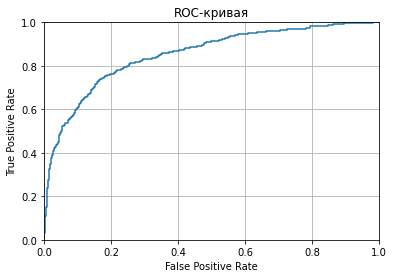

0.8528943590482885

In [40]:
fpr, tpr, thr = roc_curve(y_test, probabilities_one_test)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

roc_auc_score(y_test, probabilities_one_test)

Значение AUC-ROC метрики - 0.85 - довольно высокое (чем ближе к 1, тем лучше), что говорит нам о том, что наша модель имеет право на жизнь.

## Общий вывод

Целью нашей работы было по предоставленным нам историческим данным о поведении клиентов и расторжении договоров с банком спрогнозировать уйдёт клиент из банка в ближайшее время или нет. Необходимо было посторить модель со значением F1-меры не менее 0.59.

На начальном этапе работы мы импортировали данные и произвели первичное знакомство с данными. Несколько преобразовали формат (привели названия столбцов к snake_case), а также избавились от пропусков в данных (9% от общего массива) о количестве лет, в течение которых клиент сотрудничает с банком, путем присваивания пропускам отдельного класса и преобразования этого признака в категориальный. Также на стадии обзора данных, мы отметли, что имеется сильный дисбаланс классов по целевому признаку в соотношении 20% к 80%

Далее на стадии подготовки мы отдельно выделили признаки необходимые для обучения модели:

* credit_score — кредитный рейтинг
* geography — страна проживания
* gender — пол
* age — возраст
* tenure — сколько лет человек является клиентом банка
* balance — баланс на счёте
* num_of_products — количество продуктов банка, используемых клиентом
* has_cr_card — наличие кредитной карты
* is_active_member — активность клиента
* estimated_salary — предполагаемая зарплата  

и целевой признак:
* exited - факт ухода клиента

Разделили наш массив данных на обучающую, валидационную и тестовую выборки в соотношении 60%:20%:20%.
Категориальные признаки (geography, tenure и gender) преобразовали в колличественные техникой прямого кодирования (One-Hot Encoding). Также мы отмасштабировали колличественные признаки.

На стадии обучения моделей мы начали с модели случайного леса и подбора к ней гиперпараметров с помощью GridSearchCV. На несбалансированных признаках и с подобранными оптимальными гиперпараметрами мы получили F1-меру - **0.55**. Далее для борьбы с дисбалансом классов мы сбалансировали признаки в моделе параметром class_weight и получили в итоге F1-меру - **0.62**, выше нашей минимально допустимой 0.59.  
Для альтернативы мы также обучили модель логистической регрессии. На несбалансированных признаках модель показала весьма низкий результат F1-меры - **0.31**. Затем мы сбалансировали признаки для модели методом downsampling и получили F1-меру - **0.48**, что также является весьма скромным результатом и сильно уступает метрике модели случайного леса. Соответственно дальше мы уже продолжили нашу работу с моделью случайного леса со сбалансированными классами.

При проверке на тестовой выборке молдель показала результат F1-меры  - **0.6**, что позволяет нам принять модель как рабочую.

Также нами дополнительно была изучена AUC-ROC метрика модели. Результат - **0.85** довольно высокий, что позволяет нам сделать вывод, что наша модель действительно имеет право на существование.